### This is the combined notebook cum report which has all the details as expected for the week-2 in final capstone project

# Background of the Problem:

Being the land of opportunities, United States of America becomes the world's most welcoming place for work for the tech geeks around the world. People from different culture, ethnics move into USA for work, studies, business etc. The immigration of people goes up and up every year. People who migrate gets professionally settled over a period of time would like move up further to get settled in USA. The general problem for such people is to find a city/state which is financially affordable and with a better living standard. The better place to live is defined by the availability of residents with the same culture background, crime rate, Cost of living index, Poverty level, employment level, per capita income and the ongoing rental rate in the location. So, developing a model to cluster the locations based on these attributes will help the people to select the location. 

# Description and Usage of data:

As part of this capstone project assignment, I am taking different cities in Montgomery County in Pennsylvania and trying to segment the cities by weighing them in terms of crime rate, rental cost, Cost of living index, Poverty level, Employment rate  and per capita income. I am considering one another data to choose the better city is the availability of restaurants with different cuisines.  For example, if a location is having multiple Indian Restaurants, then that neighborhood must have more Indian community. It is assumed that the restaurants owner must have done the analysis on population with different ethnicity before to open the restaurants. These data's are used to analyze and build a model to cluster the cities  to decide the better livelihood.
 
- Crime Rate: 
Needless to say. Cities with less crime rate will be a better place to live.
- Cost of Living Index: 
A measure of expenses in the neighborhood
- Poverty Level: 
This must be direct proportional to Crime Rate. More in Poverty lead to more in crime and turns up less likelihood place to live.
- Employment Level, Per Capita Income: 
Indirect proportional to crime rate and contributes significantly to decide the better neighborhood
- Ongoing rental rate/Real Estate cost:
This is an important factor while choosing a place to live. 

#### Data References:
	1. https://data.opendatasoft.com/
	2. https://foursquare.com/
    3. https://data.montgomerycountymd.gov/
    4. Google Geo Locator

# End User/Beneficiary:
This analysis will be beneficial for anyone who wish to choose a location to buy house/get settled. This model/analysis can also be used by real estate business house' to understand the customer preferences on locations.

# Methodology Highlights:
In this analysis, we shall take different cities in Montogomery county in Pennsylvania and will estimate their goodness as livlihood.
 1. Import the Montgomery county map
 2. Import the different cities in the county from https://data.montgomerycountymd.gov/
 3. Mark those cities in the Montgomery map
 4. Fetch the availabilites of different restaurants using foursquare API
 5. Analyse different cusines available in diferent cities to decide different community presence
 6. Finally cluster the cities based on the cost of living index, crime rate, employment rate, poverty rate and rental rate


In [2]:
#Import all Required Libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [3]:
#Import the geo locations of different cities in Montgomery County in the state of Pennsylvania and display it
Montgomerydf=pd.read_csv('pennsylvania.csv')
Montgomerydf

,Latitude,Longitude,State,County,City,Name,RegionID
0,40.248003,-75.626843,PA,Montgomery,Pottstown,Washington/Rosedale,761971
1,40.184300,-75.538000,PA,Montgomery,Royersford,East End South,761171
2,40.184365,-75.226319,PA,Montgomery,Lower Gwynedd,Spring House,16311
3,40.143300,-75.422800,PA,Montgomery,Lower Providence,Downtown North,761169
4,40.185700,-75.451600,PA,Montgomery,Collegeville,Beech/Wilson,761168
5,40.130400,-75.514900,PA,Montgomery,Phoenixville,Downtown South,761170
6,40.121500,-75.339900,PA,Montgomery,Norristown,North End,761970
7,40.101300,-75.383600,PA,Montgomery,King Of Prussia,Dresher,38234
8,40.139832,-75.188891,PA,Montgomery,Upper Dublin,Fort Washington,24770
9,39.985409,-75.272983,PA,Montgomery,Wynnewood,Penn Wynne,6460


In [6]:
# Get the location of Montgomery county in Pennsylvania and print it
address = 'Montgomery County, PA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montgomery County, PA {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montgomery County, PA 40.2154361, -75.3702305.


In [48]:
# create map of Montgomery COunty, PA using latitude and longitude values and mark the cities in thecounty map
map_MontgomeryCounty = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, name in zip(Montgomerydf['Latitude'], Montgomerydf['Longitude'], Montgomerydf['City'],Montgomerydf['Name']):
    label = '{},{}'.format(city,name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_MontgomeryCounty)  
    
map_MontgomeryCounty

In [8]:
#In this section of the code, fetch all the neighborhood venues using the Foursquare API

CLIENT_ID = 'NT0QWASBRH3IGHDY315XBYAPARHXJDYL0YSUPFFCB0KBTD14' # your Foursquare ID
CLIENT_SECRET = '5RKGG5KHT3UOIPJN2W5LT0ZEBARRZC0CAFWM425CAPYLFB4D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#fetch different categories  of the venues we can get from foursquare
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()
type(category_results)
#category_results
#the next few lines of code is to understand the common catagories from the Foursquare data
#My intention is to fetch only the Food options available in the locality. 
#I will fetch the Resturants and categorize them based on their cuisines

category_list = category_results['response']['categories']
type(category_list)

for data in category_list:
    print(data['id'], data['name'])

Your credentails:
CLIENT_ID: NT0QWASBRH3IGHDY315XBYAPARHXJDYL0YSUPFFCB0KBTD14
CLIENT_SECRET:5RKGG5KHT3UOIPJN2W5LT0ZEBARRZC0CAFWM425CAPYLFB4D
4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


  
From the results above I note down the category ID#4d4b7105d754a06374d81259 for food

  

In [10]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [11]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')
type(category_dict)
print(category_dict)

{'4d4b7105d754a06374d81259': 'Food', '503288ae91d4c4b30a586d67': 'Afghan Restaurant', '4bf58dd8d48988d1c8941735': 'African Restaurant', '4bf58dd8d48988d10a941735': 'Ethiopian Restaurant', '4bf58dd8d48988d14e941735': 'American Restaurant', '4bf58dd8d48988d157941735': 'New American Restaurant', '4bf58dd8d48988d142941735': 'Asian Restaurant', '56aa371be4b08b9a8d573568': 'Burmese Restaurant', '52e81612bcbc57f1066b7a03': 'Cambodian Restaurant', '4bf58dd8d48988d145941735': 'Chinese Restaurant', '52af3a5e3cf9994f4e043bea': 'Anhui Restaurant', '52af3a723cf9994f4e043bec': 'Beijing Restaurant', '52af3a7c3cf9994f4e043bed': 'Cantonese Restaurant', '58daa1558bbb0b01f18ec1d3': 'Cha Chaan Teng', '52af3a673cf9994f4e043beb': 'Chinese Aristocrat Restaurant', '52af3a903cf9994f4e043bee': 'Chinese Breakfast Place', '4bf58dd8d48988d1f5931735': 'Dim Sum Restaurant', '52af3a9f3cf9994f4e043bef': 'Dongbei Restaurant', '52af3aaa3cf9994f4e043bf0': 'Fujian Restaurant', '52af3ab53cf9994f4e043bf1': 'Guizhou Restaura

  
    
As stated earlier, I shall fetch the Restaurant details in the next few lines of code to view the sample, data, I am fetching the data fro the first city in the county. Here it is in Pottstown
  
    

In [12]:
neighborhood_latitude = Montgomerydf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Montgomerydf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Montgomerydf.loc[0, 'City'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Pottstown are 40.24800255, -75.62684273.


In [16]:
#Now lets try to analyse the 'Food' options available in our first City - Pottstown
#the category ID for food is '4d4b7105d754a06374d81259'
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL
results = requests.get(url).json()

  
    
In the next few liens of code, we shall extract all the food venues for all the cities in the Montgomery County
CategoryId parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from category_dict.
  
    

In [17]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)
#categoryId

def getNearbyFood(names, latitudes, longitudes, radius=3000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

  
I am using a library called pickle to serialize or deserialize the python object. Its good, handy to use.
  

In [18]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('Montgomery_food_venues.pkl', 'rb') as f:
        Montgomery_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    Montgomery_venues = getNearbyFood(names=Montgomerydf['City'],
                                        latitudes=Montgomerydf['Latitude'],
                                        longitudes=Montgomerydf['Longitude']
                                       )
    with open('Montgomery_food_venues.pkl', 'wb') as f:
        pickle.dump(Montgomery_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


In [19]:
print('There are {} uniques categories.'.format(len(Montgomery_venues['Venue Category'].unique())))
Montgomery_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 73 uniques categories.


Venue Category
Pizza Place                      63
Fast Food Restaurant             45
American Restaurant              33
Coffee Shop                      30
Italian Restaurant               27
Convenience Store                26
Donut Shop                       25
Mexican Restaurant               21
Sandwich Place                   20
Café                             19
Bakery                           14
Restaurant                       13
Chinese Restaurant               13
Breakfast Spot                   12
Deli / Bodega                    11
Fried Chicken Joint              10
Diner                            10
Indian Restaurant                 8
Japanese Restaurant               8
Sushi Restaurant                  8
Ice Cream Shop                    8
Burger Joint                      8
Seafood Restaurant                7
Gastropub                         7
Sports Bar                        7
Asian Restaurant                  6
Steakhouse                        6
BBQ Joint    

In [21]:
Restaurantdf= Montgomery_venues[Montgomery_venues['Venue Category'].str.contains('Restaurant')]
print('There are {} venus for the food (holding Restaurants in their name)'.format(Restaurantdf.shape[0]))
Restaurantdf.head(2)

There are 224 venus for the food (holding Restaurants in their name)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pottstown,40.248003,-75.626843,McDonald's,40.242988,-75.619734,Fast Food Restaurant
3,Pottstown,40.248003,-75.626843,McDonald's,40.252671,-75.659760,Fast Food Restaurant


  
      
Lets analyse each neighborhood by the presence of diffeerent Cuisine. I'm creating a hot encoding for the venu categories.
  
      

In [23]:
# one hot encoding
rest_onehot = pd.get_dummies(Restaurantdf[['Venue Category']], prefix="", prefix_sep="")

#let me append the Neighborhood/City with the hot coded dataframe
rest_onehot['Neighborhood']=Restaurantdf['Neighborhood'] 
rest_onehot.head(2)

,American Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Pottstown
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Pottstown


In [24]:
# move neighborhood column to the first column for the ease of manual reading
Neighborhood = rest_onehot['Neighborhood']

rest_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
rest_onehot.insert(0, 'Neighborhood', Neighborhood)

rest_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Spanish Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Pottstown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Pottstown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Pottstown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Pottstown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Pottstown,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
venue_counts = rest_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)
venue_counts['Indian Restaurant']=venue_counts['Indian Restaurant']+venue_counts['South Indian Restaurant']+venue_counts['Asian Restaurant']
venue_counts.drop(['South Indian Restaurant','Asian Restaurant','Restaurant'],axis=1,inplace=True)
venue_counts.head(5)


,American Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Gluten-free Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,
Collegeville,3,0,0,1,0,0,3,0,0,1,6,1,0,0,1,3,0,0,1,0,2,0,1,0,0
King Of Prussia,7,1,1,0,0,0,2,0,0,0,2,1,0,1,0,0,0,2,2,0,0,0,0,0,0
Limerick,1,0,0,2,0,1,1,0,0,1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0
Lower Gwynedd,2,0,0,0,0,0,1,1,0,1,4,1,0,0,0,0,0,0,1,0,1,0,0,0,0
Lower Providence,5,0,0,1,0,0,6,0,0,4,0,0,0,0,0,4,0,0,0,0,0,0,1,1,1


In [26]:
#I would like to see what are the top 10 restaurants available in Montgomery county
venue_counts_described = venue_counts.describe().transpose()
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10


,count,mean,std,min,25%,50%,75%,max
Fast Food Restaurant,12.0,3.750000,2.301185,1.0,2.00,3.5,5.00,9.0
American Restaurant,12.0,2.750000,1.815339,1.0,1.75,2.0,3.25,7.0
Italian Restaurant,12.0,2.250000,1.602555,0.0,1.00,2.0,3.00,6.0
Mexican Restaurant,12.0,1.750000,1.422226,0.0,0.75,1.5,3.00,4.0
Indian Restaurant,12.0,1.333333,1.073087,0.0,1.00,1.0,2.00,4.0
Chinese Restaurant,12.0,1.083333,0.900337,0.0,0.75,1.0,1.25,3.0
Sushi Restaurant,12.0,0.666667,0.984732,0.0,0.00,0.0,1.00,3.0
Vegetarian / Vegan Restaurant,12.0,0.333333,0.651339,0.0,0.00,0.0,0.25,2.0
Thai Restaurant,12.0,0.333333,0.651339,0.0,0.00,0.0,0.25,2.0
Seafood Restaurant,12.0,0.583333,0.792961,0.0,0.00,0.0,1.00,2.0


In [28]:
venue_top10_list = venue_top10.index.values.tolist()
venue_top10_list

['Fast Food Restaurant',
 'American Restaurant',
 'Italian Restaurant',
 'Mexican Restaurant',
 'Indian Restaurant',
 'Chinese Restaurant',
 'Sushi Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Thai Restaurant',
 'Seafood Restaurant']

  
      
Based on our analysis, Fast Food restaurant are the most followed by American Restaurants. Over all the top 10 food categories 
gives us an idea that Montogomery county has the good mix of food ethnicity that includes american. Italian, Mexican, and other
Asian countries
  
      

  
Now I'm trying to put the availability of different cuisines in the different locations...Lets see how the Horizontal bar chart comes in and then lets explore it in group chart
  
      

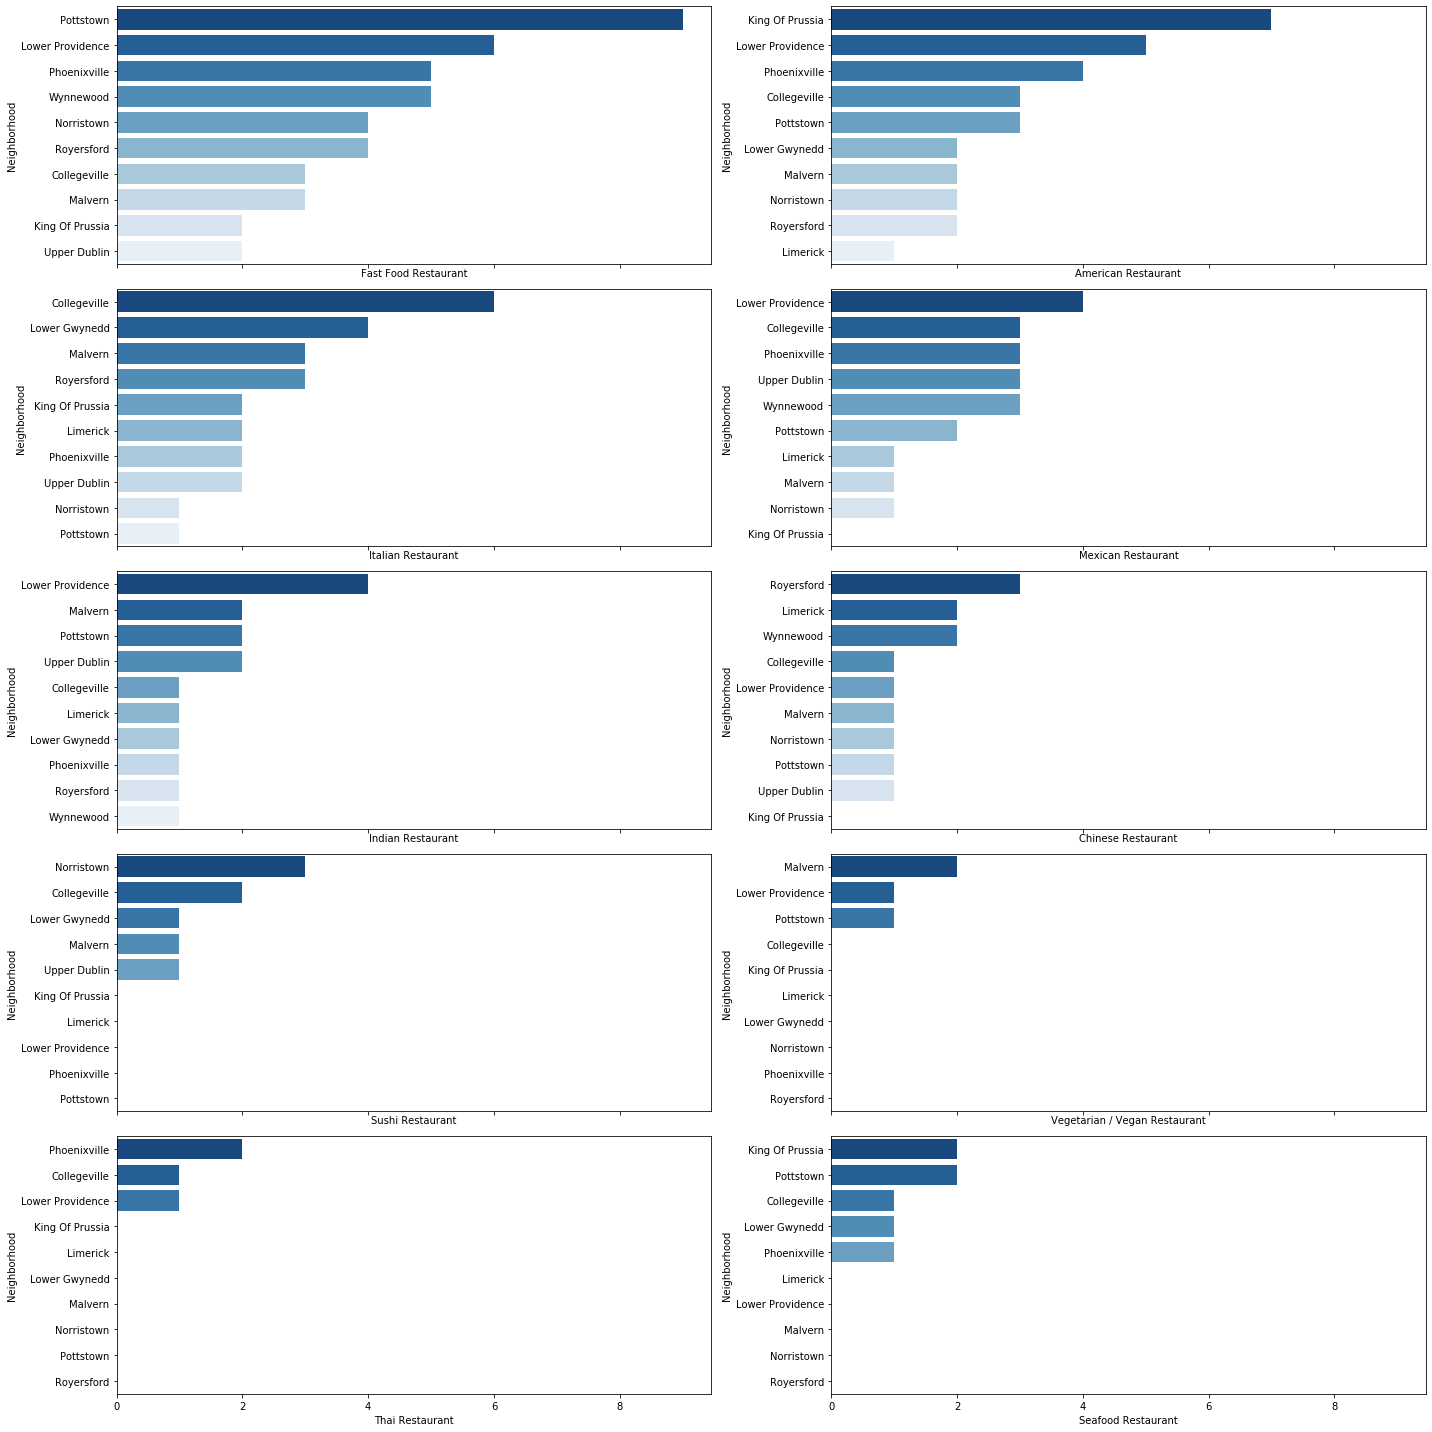

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
x=plt.show()
x

['Collegeville',
 'King Of Prussia',
 'Limerick',
 'Lower Gwynedd',
 'Lower Providence',
 'Malvern',
 'Norristown',
 'Phoenixville',
 'Pottstown',
 'Royersford',
 'Upper Dublin',
 'Wynnewood']

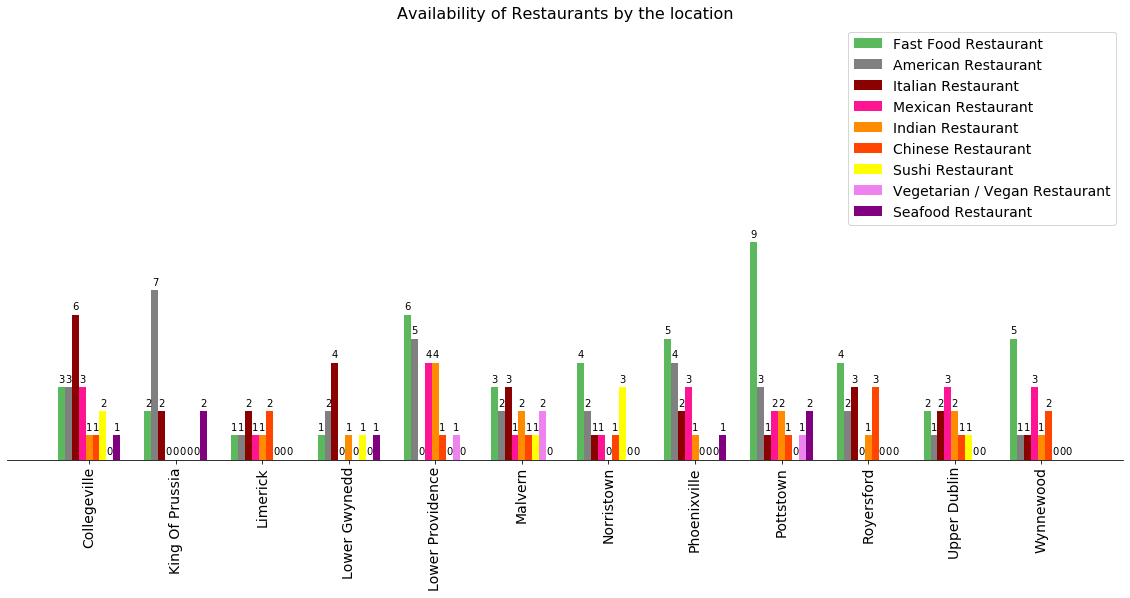

In [31]:
#Another way of reperesenting the presence of restaurants based on the neighborhood in group chat
Cities=venue_counts.index.tolist()
indx = np.arange(len(Cities))

bar_width = 0.08

indx = np.arange(len(Cities))
#
score_label = np.arange(0, 20, 2)
Fast_Food_Restaurant=list(venue_counts['Fast Food Restaurant'])
American_Restaurant=list(venue_counts['American Restaurant'])
Italian_Restaurant=list(venue_counts['Italian Restaurant'])
Mexican_Restaurant=list(venue_counts['Mexican Restaurant'])
Indian_Restaurant=list(venue_counts['Indian Restaurant'])
Chinese_Restaurant=list(venue_counts['Chinese Restaurant'])
Sushi_Restaurant=list(venue_counts['Sushi Restaurant'])
Vegan_Restaurant=list(venue_counts['Vegetarian / Vegan Restaurant'])
Seafood_Restaurant=list(venue_counts['Seafood Restaurant'])

#drawing the grouped bar chart
fig, ax = plt.subplots(figsize=(20, 8))


bar_Fast_Food_Restaurant=ax.bar(indx-(bar_width*4), Fast_Food_Restaurant, bar_width, label='Fast Food Restaurant',color='#5cb85c')
bar_American_Restaurant=ax.bar(indx-(bar_width*3), American_Restaurant, bar_width, label='American Restaurant',color='#808080')
bar_Italian_Restaurant=ax.bar(indx-(bar_width*2), Italian_Restaurant, bar_width, label='Italian Restaurant',color='#8B0000')
bar_Mexican_Restaurant=ax.bar(indx-bar_width, Mexican_Restaurant, bar_width, label='Mexican Restaurant',color='#FF1493')
bar_Indian_Restaurant=ax.bar(indx, Indian_Restaurant, bar_width, label='Indian Restaurant',color='#FF8C00')
bar_Chinese_Restaurant=ax.bar(indx+(bar_width*1), Chinese_Restaurant, bar_width, label='Chinese Restaurant',color='#FF4500')
bar_Sushi_Restaurant=ax.bar(indx+(bar_width*2), Sushi_Restaurant, bar_width, label='Sushi Restaurant',color='#FFFF00')
bar_Vegan_Restaurant=ax.bar(indx+(bar_width*3), Vegan_Restaurant, bar_width, label='Vegetarian / Vegan Restaurant',color='#EE82EE')
bar_Seafood_Restaurant=ax.bar(indx+(bar_width*4), Seafood_Restaurant, bar_width, label='Seafood Restaurant',color='#800080')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(Cities,rotation=90,fontsize=14)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label,fontsize=14)

# inserting legend for the option - intrested, not intrested, very much intrested
ax.legend(fontsize=14)

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#write an function to set the lables for each category
def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)
#call the function to set the bar labels for each categoryS
# insert_data_labels(bar_very_Interested)
# insert_data_labels(bar_Somewhat_Interested)
# insert_data_labels(bar_Not_interested)

insert_data_labels(bar_Fast_Food_Restaurant)
insert_data_labels(bar_American_Restaurant)
insert_data_labels(bar_Italian_Restaurant)
insert_data_labels(bar_Mexican_Restaurant)
insert_data_labels(bar_Indian_Restaurant)
insert_data_labels(bar_Chinese_Restaurant)
insert_data_labels(bar_Sushi_Restaurant)
insert_data_labels(bar_Vegan_Restaurant)
insert_data_labels(bar_Seafood_Restaurant)

#Remove the Y axis ticks universally
plt.yticks([])
#Provide the title for the graph.
plt.title("Availability of Restaurants by the location",fontsize=16)
#Alternate way to set the font size
#plt.title("Percentage of the Respondents' Interest in Data science Area",fontdict={'fontsize':16})

plt.show()

## Clustering and Segmenting Cities by Cost of Living, Crime Rate, employment rate, Poverty rate and Rental rate

In [40]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

pdf=pd.read_csv('pennsylvania_Metadata.csv')

Citydf=pdf['City']
Montgomerypdf=pdf.drop('City',axis=1)

from sklearn.cluster import KMeans
# Standardize the data
X_std = StandardScaler().fit_transform(Montgomerypdf)

# Run local implementation of kmeans
km = KMeans(init="k-means++",n_clusters=2, n_init=50).fit(X_std)
print('The labels out of Kmeans: ', km.labels_)
centroids=km.cluster_centers_
print('The centroids that come out of clustering: ',centroids)

#Insert the cluster label in the parent daaframe
try:
    pdf.drop('Cluster Labels', axis=1)
except:
    pdf.insert(0, 'Cluster Labels', km.labels_)
# Merge the dataframes that holdes the clustered data and the geospatial data of cities in the montgomery county
finalpdf=pd.merge(pdf, Montgomerydf, on='City')
print('\n\n\nFinal dataframe with the clustered data (refer cluster lable column) and Geospatial data of cities looks as follows \n')
finalpdf

The labels out of Kmeans:  [1 1 0 0 0 0 1 0 0 0 0 1]
The centroids that come out of clustering:  [[ 0.57767656  0.14431655 -0.55347007  0.57942639 -0.585853    0.43813729]
 [-1.15535313 -0.2886331   1.10694013 -1.15885278  1.171706   -0.87627458]]



Final dataframe with the clustered data (refer cluster lable column) and Geospatial data of cities looks as follows 



,Cluster Labels,City,Income per capita,Unemployment rate,Poverty level,Cost of living index,Crime per 100k peopl,Mean rental rate,Latitude,Longitude,State,County,Name,RegionID
0,1,Pottstown,23346,0.06,0.22,94,4325,1050,40.248003,-75.626843,PA,Montgomery,Washington/Rosedale,761971
1,1,Royersford,28169,0.06,0.13,110,2184,1300,40.184300,-75.538000,PA,Montgomery,East End South,761171
2,0,Lower Gwynedd,35755,0.05,0.10,111,832,1350,40.184365,-75.226319,PA,Montgomery,Spring House,16311
3,0,Lower Providence,43387,0.02,0.05,131,688,1200,40.143300,-75.422800,PA,Montgomery,Downtown North,761169
4,0,Collegeville,33510,0.03,0.02,124,966,1300,40.185700,-75.451600,PA,Montgomery,Beech/Wilson,761168
5,0,Phoenixville,32881,0.05,0.09,113,1317,1300,40.130400,-75.514900,PA,Montgomery,Downtown South,761170
6,1,Norristown,21986,0.07,0.22,103,2214,900,40.121500,-75.339900,PA,Montgomery,North End,761970
7,0,King Of Prussia,44934,0.04,0.07,124,800,1600,40.101300,-75.383600,PA,Montgomery,Dresher,38234
8,0,Upper Dublin,45745,0.03,0.01,135,638,1400,40.139832,-75.188891,PA,Montgomery,Fort Washington,24770
9,0,Wynnewood,54087,0.03,0.03,137,645,1400,39.985409,-75.272983,PA,Montgomery,Penn Wynne,6460


  
    
Lets look the clustered cities in the map
  
    

In [47]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

#set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1,2))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(finalpdf['Latitude'], finalpdf['Longitude'], finalpdf['City'], finalpdf['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

  
      
Lets Look at the clustered data. Lets see what are the cities are listed in cluser 0 and in cluster 1
  
      

In [42]:
cluster_0 = finalpdf.loc[finalpdf['Cluster Labels'] == 0, finalpdf.columns[1:12]]
cluster_0

,City,Income per capita,Unemployment rate,Poverty level,Cost of living index,Crime per 100k peopl,Mean rental rate,Latitude,Longitude,State,County
2,Lower Gwynedd,35755,0.05,0.10,111,832,1350,40.184365,-75.226319,PA,Montgomery
3,Lower Providence,43387,0.02,0.05,131,688,1200,40.143300,-75.422800,PA,Montgomery
4,Collegeville,33510,0.03,0.02,124,966,1300,40.185700,-75.451600,PA,Montgomery
5,Phoenixville,32881,0.05,0.09,113,1317,1300,40.130400,-75.514900,PA,Montgomery
7,King Of Prussia,44934,0.04,0.07,124,800,1600,40.101300,-75.383600,PA,Montgomery
8,Upper Dublin,45745,0.03,0.01,135,638,1400,40.139832,-75.188891,PA,Montgomery
9,Wynnewood,54087,0.03,0.03,137,645,1400,39.985409,-75.272983,PA,Montgomery
10,Malvern,48086,3.50,0.11,132,684,1700,40.036200,-75.513800,PA,Montgomery


In [43]:
cluster_1 = finalpdf.loc[finalpdf['Cluster Labels'] == 1, finalpdf.columns[1:12]]
cluster_1

,City,Income per capita,Unemployment rate,Poverty level,Cost of living index,Crime per 100k peopl,Mean rental rate,Latitude,Longitude,State,County
0,Pottstown,23346,0.06,0.22,94,4325,1050,40.248003,-75.626843,PA,Montgomery
1,Royersford,28169,0.06,0.13,110,2184,1300,40.184300,-75.538000,PA,Montgomery
6,Norristown,21986,0.07,0.22,103,2214,900,40.121500,-75.339900,PA,Montgomery
11,Limerick,24380,0.03,0.11,96,1917,1300,40.238400,-75.184329,PA,Montgomery


# Discussion and insights of Analysis:


By looking at the group chart by restaurants, we can conclude that Fast food resturants, American Restaurants, Italian and Mexican Resturants are wide spread across all the cities which is as expected. The Indian Resturants are more in Lower Providence city and Sushi Restaurants are more in Collegeville. 

The cities Pottstown, Royersford, Norristown and Limerick are clustered into one group. The other cities are clustered into group 0. Again, we can obsorve that the cities in Cluster-1 has more crime rate and less per capita income. we can see the uniquness. On the other end, the cities in Cluster-0 has less crime rate and the other factors are good compared to cities in cluster-1.

# Conclusion:
Lets assume a Indian looking for the better city to settle, he or she will prefer to choose Lower providece since it is in cluster-0 with less crime rate and other better factors. The city Lower Providence also has more Indian Resturants and as per our initial assumption, more Indian Restaurant means more Indians in the city. 

In case if a real estate house looks for a new location to start a housing project, it will choose a city from Cluster-0.

The same analysis can further enhanced to find better counties in the state or the better state in the country by fllowing the same approach.